# Final Project

**Group HOMEWORK**. This final project can be collaborative. The maximum members of a group is 2. You can also work by yourself. Please respect the academic integrity. **Remember: if you get caught on cheating, you get F.**

## A Introduction to the competition

<img src="news-sexisme-EN.jpg" alt="drawing" width="380"/>

Sexism is a growing problem online. It can inflict harm on women who are targeted, make online spaces inaccessible and unwelcoming, and perpetuate social asymmetries and injustices. Automated tools are now widely deployed to find, and assess sexist content at scale but most only give classifications for generic, high-level categories, with no further explanation. Flagging what is sexist content and also explaining why it is sexist improves interpretability, trust and understanding of the decisions that automated tools use, empowering both users and moderators.

This project is based on SemEval 2023 - Task 10 - Explainable Detection of Online Sexism (EDOS). [Here](https://codalab.lisn.upsaclay.fr/competitions/7124#learn_the_details-overview) you can find a detailed introduction to this task.

You only need to complete **TASK A - Binary Sexism Detection: a two-class (or binary) classification where systems have to predict whether a post is sexist or not sexist**. To cut down training time, we only use a subset of the original dataset (5k out of 20k). The dataset can be found in the same folder.

Different from our previous homework, this competition gives you great flexibility (and very few hints), you can determine:
-  how to preprocess the input text (e.g., remove emoji, remove stopwords, text lemmatization and stemming, etc.);
-  which method to use to encode text features (e.g., TF-IDF, N-grams, Word2vec, GloVe, Part-of-Speech (POS), etc.);
-  which model to use.

## Requirements
-  **Input**: the text for each instance.
-  **Output**: the binary label for each instance.
-  **Feature engineering**: use at least 2 different methods to extract features and encode text into numerical values.
-  **Model selection**: implement with at least 3 different models and compare their performance.
-  **Evaluation**: create a dataframe with rows indicating feature+model and columns indicating Precision, Accuracy and F1-score (using weighted average). Your results should have at least 6 rows (2 feature engineering methods x 3 models). Report best performance with (1) your feature engineering method, and (2) the model you choose.
- **Format**: add explainations for each step (you can add markdown cells). At the end of the report, write a summary and answer the following questions:
    - What preprocessing steps do you follow?
    - How do you select the features from the inputs?
    - Which model you use and what is the structure of your model?
    - How do you train your model?
    - What is the performance of your best model?
    - What other models or feature engineering methods would you like to implement in the future?
- **Two Rules**, violations will result in 0 points in the grade:
    - Not allowed to use test set in the training: You CANNOT use any of the instances from test set in the training process.
    - Not allowed to use code from generative AI (e.g., ChatGPT).

## Evaluation

The performance should be only evaluated on the test set (a total of 1086 instances). Please split original dataset into train set and test set. The test set should NEVER be used in the training process. The evaluation metric is a combination of precision, recall, and f1-score (use `classification_report` in sklearn).

The total points are 10.0. Each team will compete with other teams in the class on their best performance. Points will be deducted if not following the requirements above.

If ALL the requirements are met:
- Top 25\% teams: 10.0 points.
- Top 25\% - 50\% teams: 8.5 points.
- Top 50\% - 75\% teams: 7.0 points.
- Top 75\% - 100\% teams: 6.0 points.

## Submission
Similar as homework, submit both a PDF and .ipynb version of the report.

The report should include: (a)code, (b)outputs, (c)explainations for each step, and (d)summary (you can add markdown cells).

The due date is **December 8, Friday by 11:59pm.

In [ ]:
# insert your code
import pandas as pd
import sklearn as sk
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")
all_data = pd.read_csv("edos_labelled_data.csv")
filtered_data = pd.read_csv("edos_labelled_data.csv")
full_filtered_data = pd.read_csv("edos_labelled_data.csv")
all_data.head(5)

#removing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
engStopWords = stopwords.words("english")
stopwordz = stopwords.words("english")
engStopWords.remove("he")
engStopWords.remove("him")
engStopWords.remove("his")

engStopWords.remove("she")
engStopWords.remove("her")
engStopWords.remove("hers")
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
i = 0
for sentence in all_data['text']:
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w.lower() in engStopWords]
    f2_sentence = [w for w in word_tokens if not w.lower() in stopwordz]
    for j in range(len(filtered_sentence)):
        filtered_sentence[j] = lemmatizer.lemmatize(filtered_sentence[j])
    for k in range(len(f2_sentence)):
        f2_sentence[k] = lemmatizer.lemmatize(f2_sentence[k])
    filtered_data.iloc[i, 1] = " ".join(filtered_sentence)
    full_filtered_data.iloc[i, 1] = " ".join(f2_sentence)
    i += 1

#print(filtered_data.head(10))

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
all_data['label'] = le.fit_transform(all_data['label'])
filtered_data['label'] = le.fit_transform(all_data['label'])
train_data = all_data[all_data['split'] == 'train']
test_data = all_data[all_data['split'] == 'test']
train_data_processed = filtered_data[filtered_data['split'] == 'train']
test_data_processed = filtered_data[filtered_data['split'] == 'test']
train_data_full = full_filtered_data[full_filtered_data['split'] == 'train']
test_data_full = full_filtered_data[full_filtered_data['split'] == 'test']
#print(train_data.head(5))
#print(test_data.head(5))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Evaluating an SVM classifier on all three version of the text

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=0.0002369, random_state=123,max_iter=100, tol=None)),])
text_clf.fit(train_data_processed['text'], train_data_processed['label'])
predicted = text_clf.predict(test_data_processed['text'])
from sklearn import metrics
print(metrics.classification_report(test_data_processed['label'], predicted))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       789
           1       0.73      0.43      0.54       297

    accuracy                           0.80      1086
   macro avg       0.77      0.69      0.71      1086
weighted avg       0.79      0.80      0.78      1086



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=0.0002369, random_state=123,max_iter=1000, tol=None)),])
text_clf.fit(train_data['text'], train_data['label'])
predicted = text_clf.predict(test_data['text'])
from sklearn import metrics
print(metrics.classification_report(test_data['label'], predicted))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       789
           1       0.77      0.45      0.57       297

    accuracy                           0.81      1086
   macro avg       0.80      0.70      0.72      1086
weighted avg       0.81      0.81      0.80      1086



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=0.0002369, random_state=123,max_iter=100, tol=None)),])
text_clf.fit(train_data_full['text'], train_data_full['label'])
predicted = text_clf.predict(test_data_full['text'])
from sklearn import metrics
print(metrics.classification_report(test_data_full['label'], predicted))

              precision    recall  f1-score   support

  not sexist       0.82      0.94      0.87       789
      sexist       0.74      0.43      0.55       297

    accuracy                           0.80      1086
   macro avg       0.78      0.69      0.71      1086
weighted avg       0.80      0.80      0.78      1086



In [ ]:
# training tfidf on unprocessed version of the text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_train_tfidf = tfidf_vectorizer.fit_transform(train_data["text"])
#print(X_train_tfidf)
#print()
X_test_tfidf = tfidf_vectorizer.fit_transform(test_data["text"])
#print(X_test_tfidf)


In [ ]:
# using tfidf to create a KNN classifier

In [ ]:
# using tfidf to create a logistic regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, classification_report

classifier = LR()
#print(train_data)
classifier.fit(X_train_tfidf, train_data['label'])




predicted = classifier.predict(X_test_tfidf)
accuracy = accuracy_score(test_data['label'], predicted)
print(accuracy)

report = classification_report(test_data['label'], predicted)
print("Classification Report:\n", report)

0.7173112338858195
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.83       789
           1       0.36      0.04      0.08       297

    accuracy                           0.72      1086
   macro avg       0.55      0.51      0.46      1086
weighted avg       0.63      0.72      0.63      1086



In [ ]:
# using tfidf to create a naive bayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data['text'], train_data['label'])
predicted2=model.predict(test_data['text'])

accuracy2 = accuracy_score(test_data['label'], predicted2)
print(accuracy2)

report2 = classification_report(test_data['label'], predicted2)
print("Classification Report:\n", report2)


0.7311233885819521
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       789
           1       0.86      0.02      0.04       297

    accuracy                           0.73      1086
   macro avg       0.79      0.51      0.44      1086
weighted avg       0.76      0.73      0.62      1086



In [ ]:
# creating a logistic regression model with tfidf again, but this time using processed text data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_train_tfidf = tfidf_vectorizer.fit_transform(train_data_processed["text"])
#print(X_train_tfidf)
#print()
X_test_tfidf = tfidf_vectorizer.transform(test_data_processed["text"])
#print(X_test_tfidf)

from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, classification_report

classifier = LR()
#print(train_data)
classifier.fit(X_train_tfidf, train_data_processed['label'])




predicted = classifier.predict(X_test_tfidf)
accuracy = accuracy_score(test_data_processed['label'], predicted)
print(accuracy)

report = classification_report(test_data_processed['label'], predicted)
print("Classification Report:\n", report)

0.7918968692449355
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       789
           1       0.76      0.35      0.48       297

    accuracy                           0.79      1086
   macro avg       0.78      0.65      0.67      1086
weighted avg       0.79      0.79      0.76      1086



In [ ]:
# creating naive bayes using tfidf and processed text data

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data_processed['text'], train_data_processed['label'])
predicted2=model.predict(test_data_processed['text'])

accuracy2 = accuracy_score(test_data_processed['label'], predicted2)
print(accuracy2)

report2 = classification_report(test_data_processed['label'], predicted2)
print("Classification Report:\n", report2)

0.7412523020257827
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       789
           1       0.94      0.06      0.11       297

    accuracy                           0.74      1086
   macro avg       0.84      0.53      0.48      1086
weighted avg       0.79      0.74      0.65      1086



In [ ]:
# creating KNN using tfidf and processed text data

mean of CV scores across 10 folds :  0.697350267075804
standard deviation of CV scores across 10 folds :  0.007363254233043506
max accuracy is :  0.7011688828275939
this occurs when K is :  7


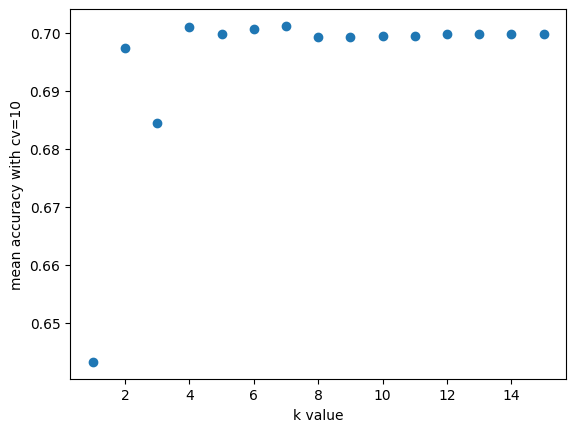

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_train_tfidf = tfidf_vectorizer.fit_transform(train_data_processed["text"])
#print(X_train_tfidf)
#print()
X_test_tfidf = tfidf_vectorizer.transform(test_data_processed["text"])
#print(X_test_tfidf)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_tfidf)
scaled_data = scaler.fit_transform(X_train_tfidf)
X_train = scaled_data
Y_train = train_data['label']
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
KNeighClassifier = neigh.fit(scaled_data, train_data['label'])
from sklearn.model_selection import cross_val_score
CV_score = cross_val_score(KNeighClassifier, scaled_data, train_data['label'], cv=10)
print("mean of CV scores across 10 folds : ", CV_score.mean())
print("standard deviation of CV scores across 10 folds : ", CV_score.std())\

k_val = []
CV_eval_score = []
for i in range(15):
    # use i + 1 to go 1-15 instead of 0-14
    neigh = KNeighborsClassifier(n_neighbors=i + 1)
    KNeighClassifier = neigh.fit(X_train, Y_train)
    k_val.append(i + 1)
    CV_eval_score.append(cross_val_score(KNeighClassifier, X_train, Y_train, cv=10).mean())
import matplotlib.pyplot as plt
plt.scatter(k_val, CV_eval_score)
plt.xlabel("k value")
plt.ylabel("mean accuracy with cv=10")
print("max accuracy is : ", max(CV_eval_score))
print("this occurs when K is : ", CV_eval_score.index(max(CV_eval_score), 5) + 1)

In [ ]:
# tfidf + SVM - Done
# tfidf + KNN - Done
# tfidf + LR - Done
# # # # # # # # # # #
# bag of words (count vectorizer) + SVM - ToDo
# bag of words (count vectorizer) + KNN - ToDo
# bag of words (count vectorizer) + LR - ToDo

In [ ]:
# bag of words (count vectorizer) + SVM
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bag_of_words_df = pd.read_csv("edos_labelled_data.csv")
X = vectorizer.fit_transform(train_data['text'])

X = X.toarray()

print(len(X))

4193


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
text_clf = Pipeline([('vect', CountVectorizer()),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=0.0002369, random_state=123,max_iter=1000, tol=None)),])
text_clf.fit(train_data['text'], train_data['label'])
predicted = text_clf.predict(test_data['text'])
from sklearn import metrics
print(metrics.classification_report(test_data['label'], predicted))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       789
           1       0.59      0.59      0.59       297

    accuracy                           0.78      1086
   macro avg       0.72      0.72      0.72      1086
weighted avg       0.78      0.78      0.78      1086



In [ ]:
# bag of words (count vectorizer) + LR
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, classification_report

classifier = LR()
#print(train_data)
classifier.fit(X, train_data['label'])


Y = vectorizer.transform(test_data['text'])
Y = Y.toarray()
predicted = classifier.predict(Y)
accuracy = accuracy_score(test_data['label'], predicted)
print(accuracy)

report = classification_report(test_data['label'], predicted)
print("Classification Report:\n", report)

0.8121546961325967
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       789
           1       0.71      0.53      0.61       297

    accuracy                           0.81      1086
   macro avg       0.77      0.72      0.74      1086
weighted avg       0.80      0.81      0.80      1086



In [ ]:
# bag of words (count vectorizer) + naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(vectorizer, MultinomialNB())
model.fit(train_data['text'], train_data['label'])
predicted2=model.predict(test_data['text'])

accuracy2 = accuracy_score(test_data['label'], predicted2)
print(accuracy2)

report2 = classification_report(test_data['label'], predicted2)
print("Classification Report:\n", report2)

0.7826887661141805
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       789
           1       0.68      0.38      0.49       297

    accuracy                           0.78      1086
   macro avg       0.74      0.66      0.68      1086
weighted avg       0.77      0.78      0.76      1086



In [ ]:
# bag of words (count vectorizer) +

In [ ]:
# failed One-Hot encoding

In [ ]:


#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.preprocessing import Binarizer

#onehot = Binarizer()
#freq = CountVectorizer()

#corpus = freq.fit_transform(train_data_processed['text'])
#changed = onehot.fit_transform(corpus)

#predicted3=model.predict(test_data_processed['text'])

#accuracy3 = accuracy_score(test_data_processed['label'], predicted2)
#print(accuracy2)

#report3 = classification_report(test_data_processed['label'], predicted2)
#print("Classification Report:\n", report2)

## Summary

1. What preprocessing steps do you follow?
   
   Your answer: We mainly used stopwords to preprocess the text data, but after some testing we found that by not preprocessing the data, you could achieve higher weighted F1 accuracies.
   
2. How do you select the features from the inputs?
   
   Your answer: We used TFIDF and Bag of Words. We decided to use these after much research into the different methods of feature extraction. One feature that we had originally tried using but was found to not work was One-Hot encoding.
   
3. Which model you use and what is the structure of your model?
   
   Your answer: The models we used were Logistic Regression, Naive Bayes, and Support Vector Machines. The Logistic Regression model encodes text based off the classifier given to the sexist and not sexist labels. The Naive Bayes model encodes text by using a maximum likelyhood estimation and placing each word in categories. The Support Vector Machine encodes the text by finding a hyperplane to distribute the text values
   
4. How do you train your model?
   
   Your answer: We first encoded the text via our methods of feature extraction so that it was converted to numbers to be used by our models. Then we ran the encoded text through our three models to train them.
   
5. What is the performance of your best model?
   
   Your answer: The performance of the best models resulted in a wieghted F1 average of 0.8 which was found by using both TFIDF + SVM or Bag of Words + Logistic Regression.
   
6. What other models or feature engineering methods would you like to implement in the future?
   
   Your answer: In the future, we would like to research and develop a form of text preprocessing that results in higher F1-scores, since what we had attempted to do for preprocessing was not successful.




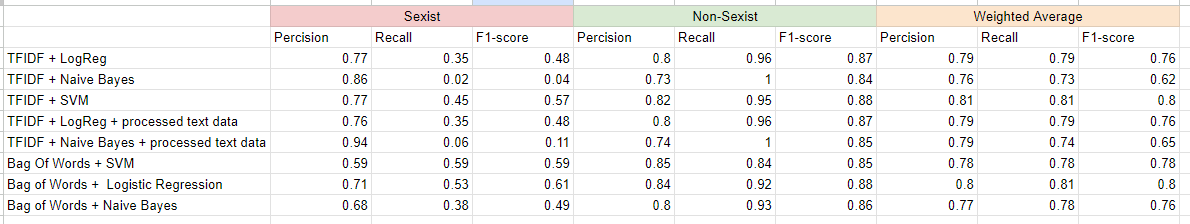
   